## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

## Extracting Data

In [4]:
df = pd.read_csv('/content/MobilePriceClassification.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
df.shape

(2000, 21)

In [12]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
df['battery_power'].unique()

array([ 842, 1021,  563, ..., 1139, 1467,  858])

### is there have any null values? as wee see the data is clean

In [14]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

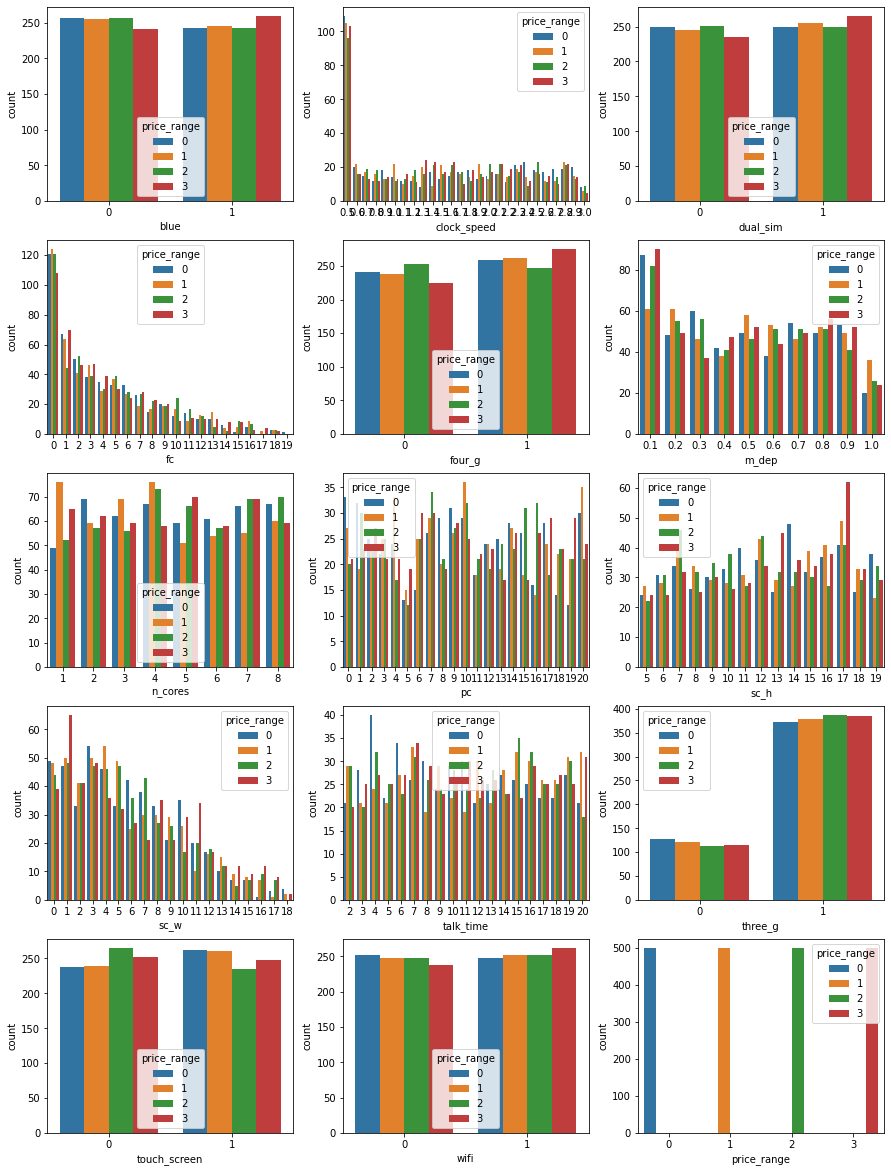

In [15]:
cat_features=list()
num_features=list()
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values<30:
      cat_features.append(column_name)
    else:
      num_features.append(column_name)
i = 1
plt.figure(figsize = (15,25))
for feature in cat_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , data = df,hue='price_range')
    i +=1

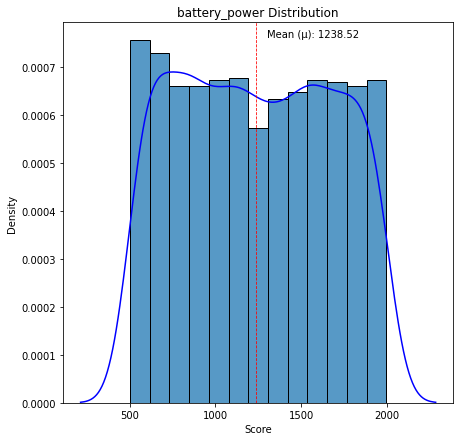

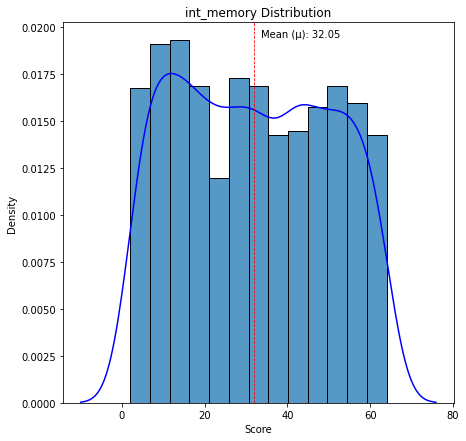

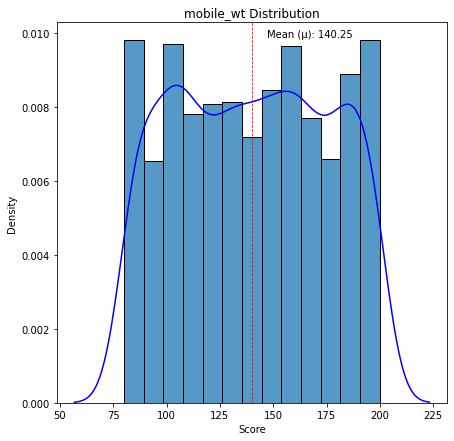

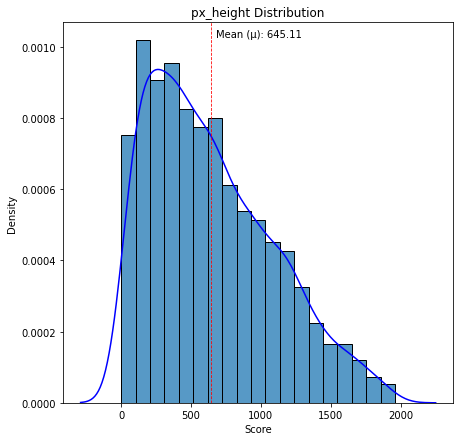

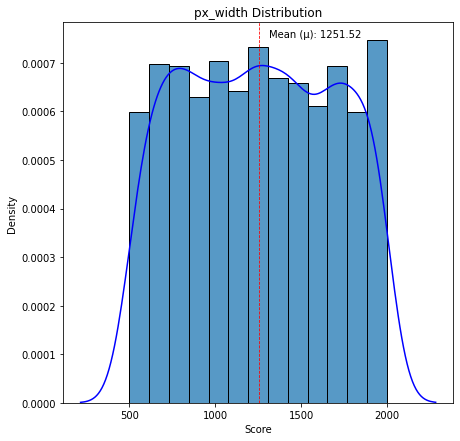

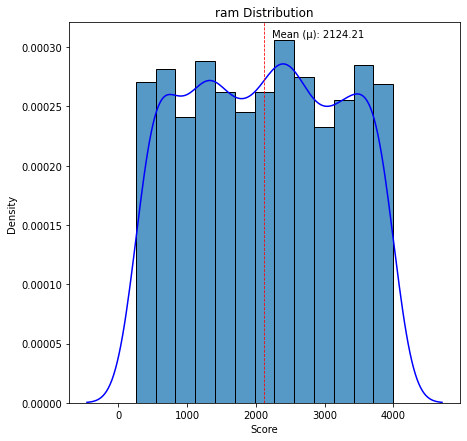

In [16]:
for column_name in num_features:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(df[column_name], stat='density')
  sns.kdeplot(df[column_name], color='blue')
  plt.axvline(df[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(df[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

## Let's split data to test and training data

In [17]:
y = df['price_range']
X = df.drop('price_range', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

## Logistic regression

In [18]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [19]:
y_pred_lr = lr.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_lr)
accuracy

0.638

In [24]:
len(df[df['price_range']==1])

500

In [25]:
len(df[df['price_range']==2])

500

In [26]:
len(df[df['price_range']==3])

500

In [27]:
len(df[df['price_range']==0])

500

## Confusion matrix

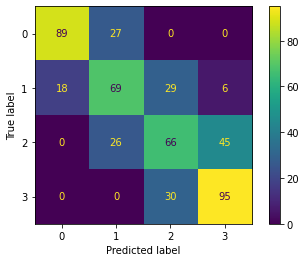

In [28]:
metrics.plot_confusion_matrix(lr,X_test, y_test)

In [29]:
91+65+62+85+30+1+27+31+11+1+29+40+27

500

## Random Forest

In [30]:
rc = RandomForestClassifier(random_state = 42)
rc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred_rc = rc.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_rc)
accuracy

0.864

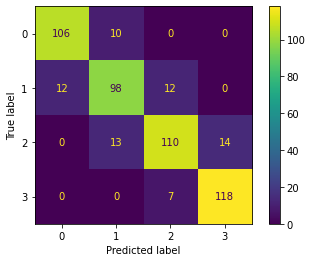

In [32]:
metrics.plot_confusion_matrix(rc,X_test, y_test)

## Support vector machines

In [33]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [34]:
y_pred_svc = svc.predict(X_test)
accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc)
accuracy_svc

0.954

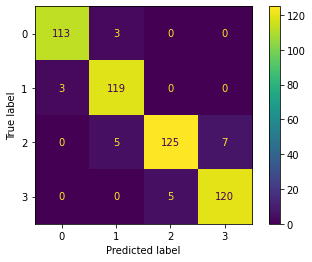

In [35]:
metrics.plot_confusion_matrix(svc,X_test, y_test)

### functions for these three algorithms

In [36]:
def preprocess(name):
    df = pd.read_csv(name)
    y = df['price_range']
    X = df.drop('price_range', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = preprocess('/content/MobilePriceClassification.csv')

In [37]:
def modelling(x1, x2, y1, y2):
    
    
    lr = LogisticRegression(random_state = 42)
    rc =  RandomForestClassifier(random_state = 42)
    svc = SVC()
    
    lr.fit(X_train, y_train)
    rc.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    
    y_pred_lr = lr.predict(X_test)
    y_pred_rc = rc.predict(X_test)
    y_pred_svc = svc.predict(X_test)
    
    accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
    accuracy_rc = metrics.accuracy_score(y_test, y_pred_rc)
    accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc)
    
    accuracy_list = [accuracy_lr, accuracy_rc, accuracy_svc]
    
    final = max(accuracy_list)
        
    return final
final = modelling(X_train, X_test, y_train, y_test)
final

0.952

### creating class for our functions

In [41]:
class mine:
  def processs(name):
        df = pd.read_csv(name)
        y = df['price_range']
        X = df.drop('price_range', axis = 1)
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
        return X_train, X_test, y_train, y_test
        
  def modeling(x1, x2, y1, y2):
    
    
        lr = LogisticRegression(random_state = 42)
        rc =  RandomForestClassifier(random_state = 42)
        svc = SVC()
    
        lr.fit(X_train, y_train)
        rc.fit(X_train, y_train)
        svc.fit(X_train, y_train)
    
        y_pred_lr = lr.predict(X_test)
        y_pred_rc = rc.predict(X_test)
        y_pred_svc = svc.predict(X_test)
    
        accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
        accuracy_rc = metrics.accuracy_score(y_test, y_pred_rc)
        accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc)
    
        accuracy_list = [accuracy_lr, accuracy_rc, accuracy_svc]
        final = max(accuracy_list)
        
        return final
X_train, X_test, y_train, y_test = mine.processs('/content/MobilePriceClassification.csv')
final = mine.modeling(X_train, X_test, y_train, y_test)
final

0.958

In [43]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Standard scaler

In [42]:
from sklearn.preprocessing import StandardScaler

# Normalize Training Data 
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#Converting numpy array to dataframe
X_train_std_df = pd.DataFrame(X_train_std, index=X_train.index, columns=X_train.columns)
X_test_std_df = pd.DataFrame(X_test_std, index=X_test.index, columns=X_test.columns) 
X_train_std_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1205,-0.348986,-0.981504,0.470895,0.97368,-0.555147,0.948016,-0.533022,-0.707763,1.575132,1.533659,0.672024,-0.920443,-1.012874,-0.241568,-1.002870,-0.173142,-1.264617,0.547564,1.008032,0.981504
1703,-0.693599,-0.981504,-0.141505,0.97368,0.822389,-1.054835,-0.257150,-0.011603,-1.393153,-0.216095,-0.159552,0.248341,0.666248,-1.429233,-1.475253,-0.626791,0.395792,-1.826269,1.008032,0.981504
1123,1.102498,1.018844,0.715855,0.97368,-0.784736,-1.054835,-1.084767,1.380719,1.292439,-1.528409,-0.658497,-0.415329,-0.153627,-0.565813,-0.766678,-0.399967,-1.080127,0.547564,-0.992032,0.981504
472,-0.385501,-0.981504,1.205776,0.97368,-1.014326,0.948016,0.735991,1.728799,0.953206,-0.653533,-0.991127,0.572248,0.138193,-0.152632,-1.475253,-0.853615,-0.895637,0.547564,1.008032,-1.018844
1215,1.488191,-0.981504,0.348415,0.97368,-0.325558,0.948016,1.342910,-1.055844,1.264169,1.096220,-0.991127,-0.453836,-1.170364,-0.014596,-0.530486,-0.173142,1.502732,0.547564,1.008032,0.981504


## K-neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train,y_train)

predicted= model.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,predicted)
accuracy

0.928

## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
first_tree = DecisionTreeClassifier()
first_tree.fit(X_train, y_train)
y_pred=first_tree.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.848

In [46]:
class func:
    def process(data_name):
        df=pd.read_csv(data_name)
        y = df['price_range']
        X = df.drop('price_range', axis = 1)
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
        return X_train, X_test, y_train, y_test

    def model(x1,x2,y1,y2):
        dt=DecisionTreeClassifier(random_state=42)
        knn=KNeighborsClassifier()
    
        dt.fit(X_train,y_train)
        knn.fit(X_train,y_train)
    
        y_pred_dt=dt.predict(X_test)
        y_pred_knn=knn.predict(X_test)
    
        accuracy_dt=metrics.accuracy_score(y_test,y_pred_dt)
        accuracy_knn=metrics.accuracy_score(y_test,y_pred_knn)
    
        accuracy_list=[accuracy_dt ,accuracy_knn]
        
        final = max(accuracy_list)

        return final

In [47]:
X_train, X_test, y_train, y_test = func.process('/content/MobilePriceClassification.csv')
final = func.model(X_train, X_test, y_train, y_test)
final

0.93